In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
from keras.models import load_model
import seaborn as sns
import pandas as pd

In [9]:
def deprocess_inception(y, rescale=False):
    x = copy(y).astype(float)
    x += 1.0
    x /= 2.0
    if rescale:
        x *= 255.0
    return x


def preprocess_inception(y):
    x = copy(y).astype(float)
    x /= 255.0
    x *= 2.0
    x -= 1.0
    return x


def calc_pert(img_num, x_true, x_adv):
    return deprocess_inception(x_adv[img_num] - x_true[img_num])


def display_adv_examples(
    img_num, x_test_adv, model, x_test, y_test, verbose=False, x_test_bb=None
):
    if verbose:
        print("Truth: " + str(y_test[img_num : img_num + 1]))
        print(
            "Model predict on true image: "
            + str(model.predict(x_test[img_num : img_num + 1]))
        )
        print(
            "Model predict on adversarial image: "
            + str(model.predict(x_test_adv[img_num : img_num + 1]))
        )
        if x_test_bb is not None:
            print(
                "Model predict on BB adversarial image: "
                + str(model.predict(x_test_bb[img_num : img_num + 1]))
            )
        print("")

    plt.figure()
    print("True Image Deprocessed:")
    img = plt.imshow(deprocess_inception(x_test[img_num]))
    img.set_cmap("hot")
    plt.axis("off")
    plt.show()

    print("Adversarial Image Deprocessed:")
    plt.figure()
    img = plt.imshow(deprocess_inception(x_test_adv[img_num]))
    img.set_cmap("hot")
    plt.axis("off")
    plt.show()

    print("Perturbation:")
    plt.figure()
    img = plt.imshow(deprocess_inception((x_test_adv[img_num] - x_test[img_num]) * 20))
    img.set_cmap("hot")
    plt.axis("off")
    plt.show()

In [31]:
def get_results(directory, save=False):
    x_test = np.load(os.path.join(directory, "data/val_x.npy"), mmap_mode="r")
    y_test = np.load(os.path.join(directory, "data/val_y.npy"))

    x_test_pgd = np.load(
        os.path.join(directory, "data/pgd_eps02_white_box.npy"), mmap_mode="r"
    )
    x_test_pgd_bb = np.load(
        os.path.join(directory, "data/pgd_eps02_black_box.npy"), mmap_mode="r"
    )

    if save:
        preds_clean = model.predict(x_test)
        np.save("../data/winning_model_preds.npy", preds_clean)

    return (x_test, y_test, x_test_pgd, x_test_pgd_bb)

1/1 [==============================] - 2s 2s/step
Truth: [[0. 1.]]
1/1 [==============================] - 0s 122ms/step
Model predict on true image: [[0.0630758  0.93692416]]
1/1 [==============================] - 0s 135ms/step
Model predict on adversarial image: [[0.10105977 0.8989402 ]]
1/1 [==============================] - 0s 128ms/step
Model predict on BB adversarial image: [[0.10105977 0.8989402 ]]

True Image Deprocessed:


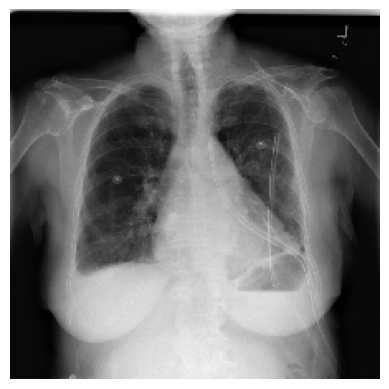

Adversarial Image Deprocessed:


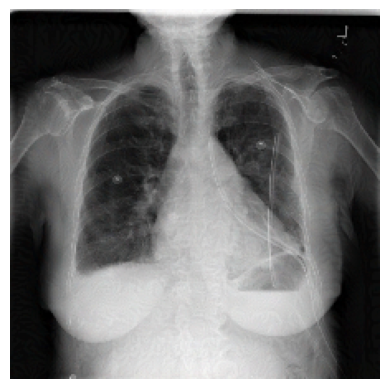

Perturbation:


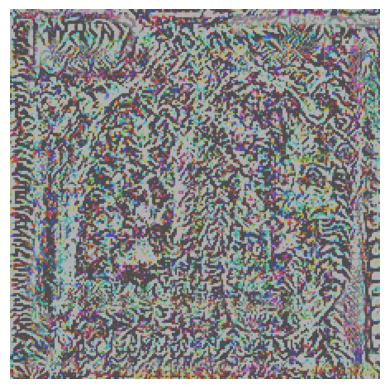

Truth: [[0. 1.]]
1/1 [==============================] - 0s 131ms/step
Model predict on true image: [[0.04620693 0.95379305]]
1/1 [==============================] - 0s 136ms/step
Model predict on adversarial image: [[0.07668094 0.923319  ]]
1/1 [==============================] - 0s 145ms/step
Model predict on BB adversarial image: [[0.07668094 0.923319  ]]

True Image Deprocessed:


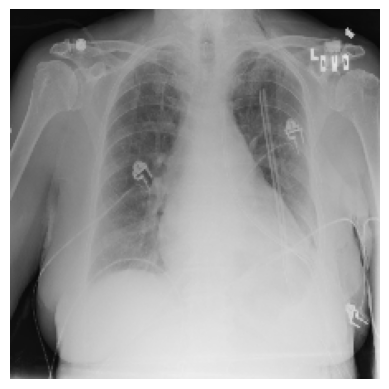

Adversarial Image Deprocessed:


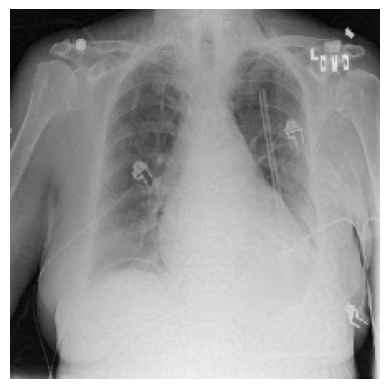

Perturbation:


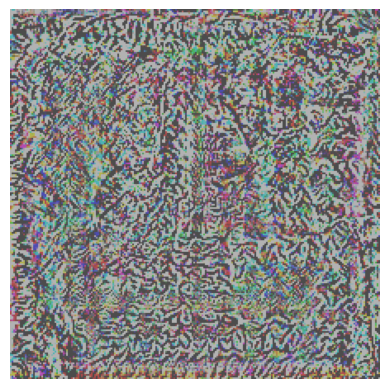

In [32]:
model = load_model(
    "../models/ResNet50_e10_LearnRate-0.001_weights.epoch-01-val_acc-0.5000.hdf5"
)
(x_test, cxr_y_test, x_test_pgd_wb, x_test_pgd_bb) = get_results("..", save=True)

display_adv_examples(
    2, x_test_pgd_wb, model, x_test, cxr_y_test, verbose=True, x_test_bb=x_test_pgd_bb
)
display_adv_examples(
    3, x_test_pgd_wb, model, x_test, cxr_y_test, verbose=True, x_test_bb=x_test_pgd_bb
)